In [27]:
import numpy as np
import matplotlib.pyplot as plt
# Load pylab
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [28]:
# Load the bike data
X = np.loadtxt('data/train.csv',  delimiter=',', 
               skiprows=1, usecols=range(0,13),converters = {1: datestr2num})
y = np.loadtxt('data/train.csv',  delimiter=',', 
               skiprows=1, usecols=[14])
X_real_test = np.loadtxt('data/test.csv',  delimiter=',', 
               skiprows=1, usecols=range(0,13),converters = {1: datestr2num})
print y

[  16.   40.   32. ...,  168.  129.   88.]


In [29]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print y_test

[ 127.   13.  163. ...,   26.  127.   84.]


In [30]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
y_pred_train = regressor.predict(X_train)
regressor.score(X_train, y_train)

0.39002506727743635

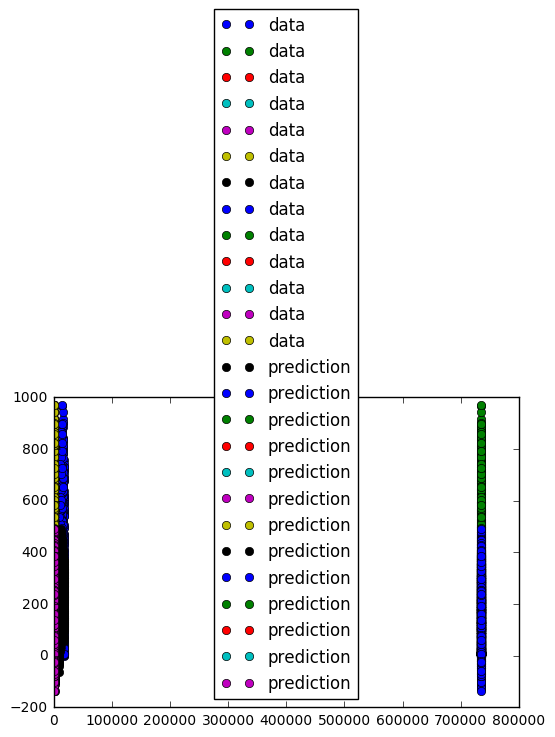

In [32]:
plt.plot(X_train, y_train, 'o', label="data")
plt.plot(X_train, y_pred_train, 'o', label="prediction")
plt.legend(loc='best')

In [33]:
y_pred_test = regressor.predict(X_test)
print y_pred_test

[ 252.12897292   49.96483905  194.02489372 ...,  114.94749682  172.92078577
   70.10697962]


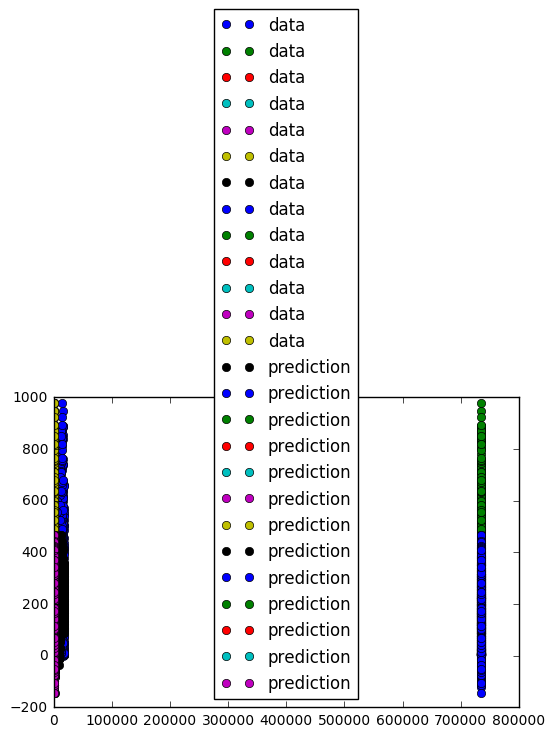

In [34]:
plt.plot(X_test, y_test, 'o', label="data")
plt.plot(X_test, y_pred_test, 'o', label="prediction")
plt.legend(loc='best')

In [35]:
regressor.score(X_test, y_test)

0.38699048316706824

In [36]:
y_pred_test_real = regressor.predict(X_real_test)
print y_pred_test_real

[ -38.49578632  -19.63871869  -11.62038372 ...,  310.9220172   330.91037878
  320.10729797]


In [37]:
for i in range (0,len(y_pred_test_real)-1):
    if y_pred_test_real[i] < 0:
        y_pred_test_real[i] = 0
print y_pred_test_real[6493-1]
print X_real_test[6493-1,0]
X_real_test[0,0].astype(int)
X_real_test[0,0] = int(float(X_real_test[0,0]))
print type(X_real_test[0,0])
X_real_test[0,0]
#caster en int !!

320.107297967
17379.0
<type 'numpy.float64'>


432.0

In [38]:
y_pred_test_real_final = np.ndarray(shape=(len(y_pred_test_real),2), dtype=float)
for i in range (0,len(y_pred_test_real)):
    y_pred_test_real_final[i,0] = X_real_test[i,0]
    y_pred_test_real_final[i,1] = y_pred_test_real[i]
print y_pred_test_real_final

[[   432.              0.        ]
 [   433.              0.        ]
 [   434.              0.        ]
 ..., 
 [ 17377.            310.9220172 ]
 [ 17378.            330.91037878]
 [ 17379.            320.10729797]]


In [39]:
numpy.savetxt("predictive_count.csv", y_pred_test_real_final, delimiter=",")